In [1]:
import requests
r=requests.get('''https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression/housing_scale''')

In [2]:
from sklearn.datasets import load_svmlight_file
from io import BytesIO
x,y=load_svmlight_file(f=BytesIO(r.content),n_features=13)
x=x.toarray()

In [3]:
import numpy
n_samples,n_features=x.shape
x=numpy.column_stack((x,numpy.ones((n_samples,1))))
y=y.reshape((-1,1))

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.3)

In [5]:
penalty_factor=0.5
learning_rate=0.0005
max_epoch=400
losses_train=[]
losses_val=[]

In [6]:
w = numpy.zeros((n_features + 1, 1))

In [7]:
for epoch in range(max_epoch):
    diff=numpy.dot(x_train,w)-y_train
    G=penalty_factor*w+numpy.dot(x_train.transpose(),diff)
    G=-G
    w+=learning_rate*G
    
    y_predict=numpy.dot(x_train,w)
    loss_train=numpy.average(numpy.abs(y_predict-y_train))
    losses_train.append(loss_train)
    
    y_predict=numpy.dot(x_val,w)
    loss_val=numpy.average(numpy.abs(y_predict-y_val))
    losses_val.append(loss_val)

Text(0.5,1,'The graph of absolute diff value varing with the number of iterations')

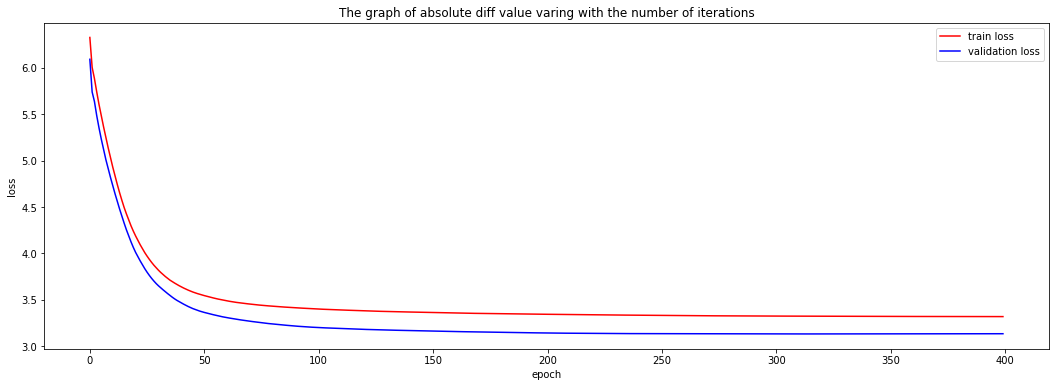

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
plt.plot(losses_train, "-", color="r", label="train loss")
plt.plot(losses_val, "-", color="b", label="validation loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.title("The graph of absolute diff value varing with the number of iterations")